In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [44]:
df = pd.read_csv('CC GENERAL.csv')

In [45]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
df.shape

(8950, 18)

In [47]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [48]:
#df = df.set_index('CUST_ID')
#df

In [49]:
#Check Null Values
df.isnull().any()
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [50]:
#Filling NaN values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace = True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace = True)

df.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [51]:
#Drop the Customer ID as it is not needed
df.drop('CUST_ID', axis = 1, inplace= True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [52]:
# #Exploratory Data Analysis - 1

# #Defining Function to help for Plotting Graphs
# def distributions(feature):
#     sns.displot(x=feature, data=df)
#     plt.title(f"{feature} distribution plot")
#     plt.xlabel(feature)
#     plt.ylabel("Count")
#     plt.show()

numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# for feature in numerical_features:
#     distributions(feature)

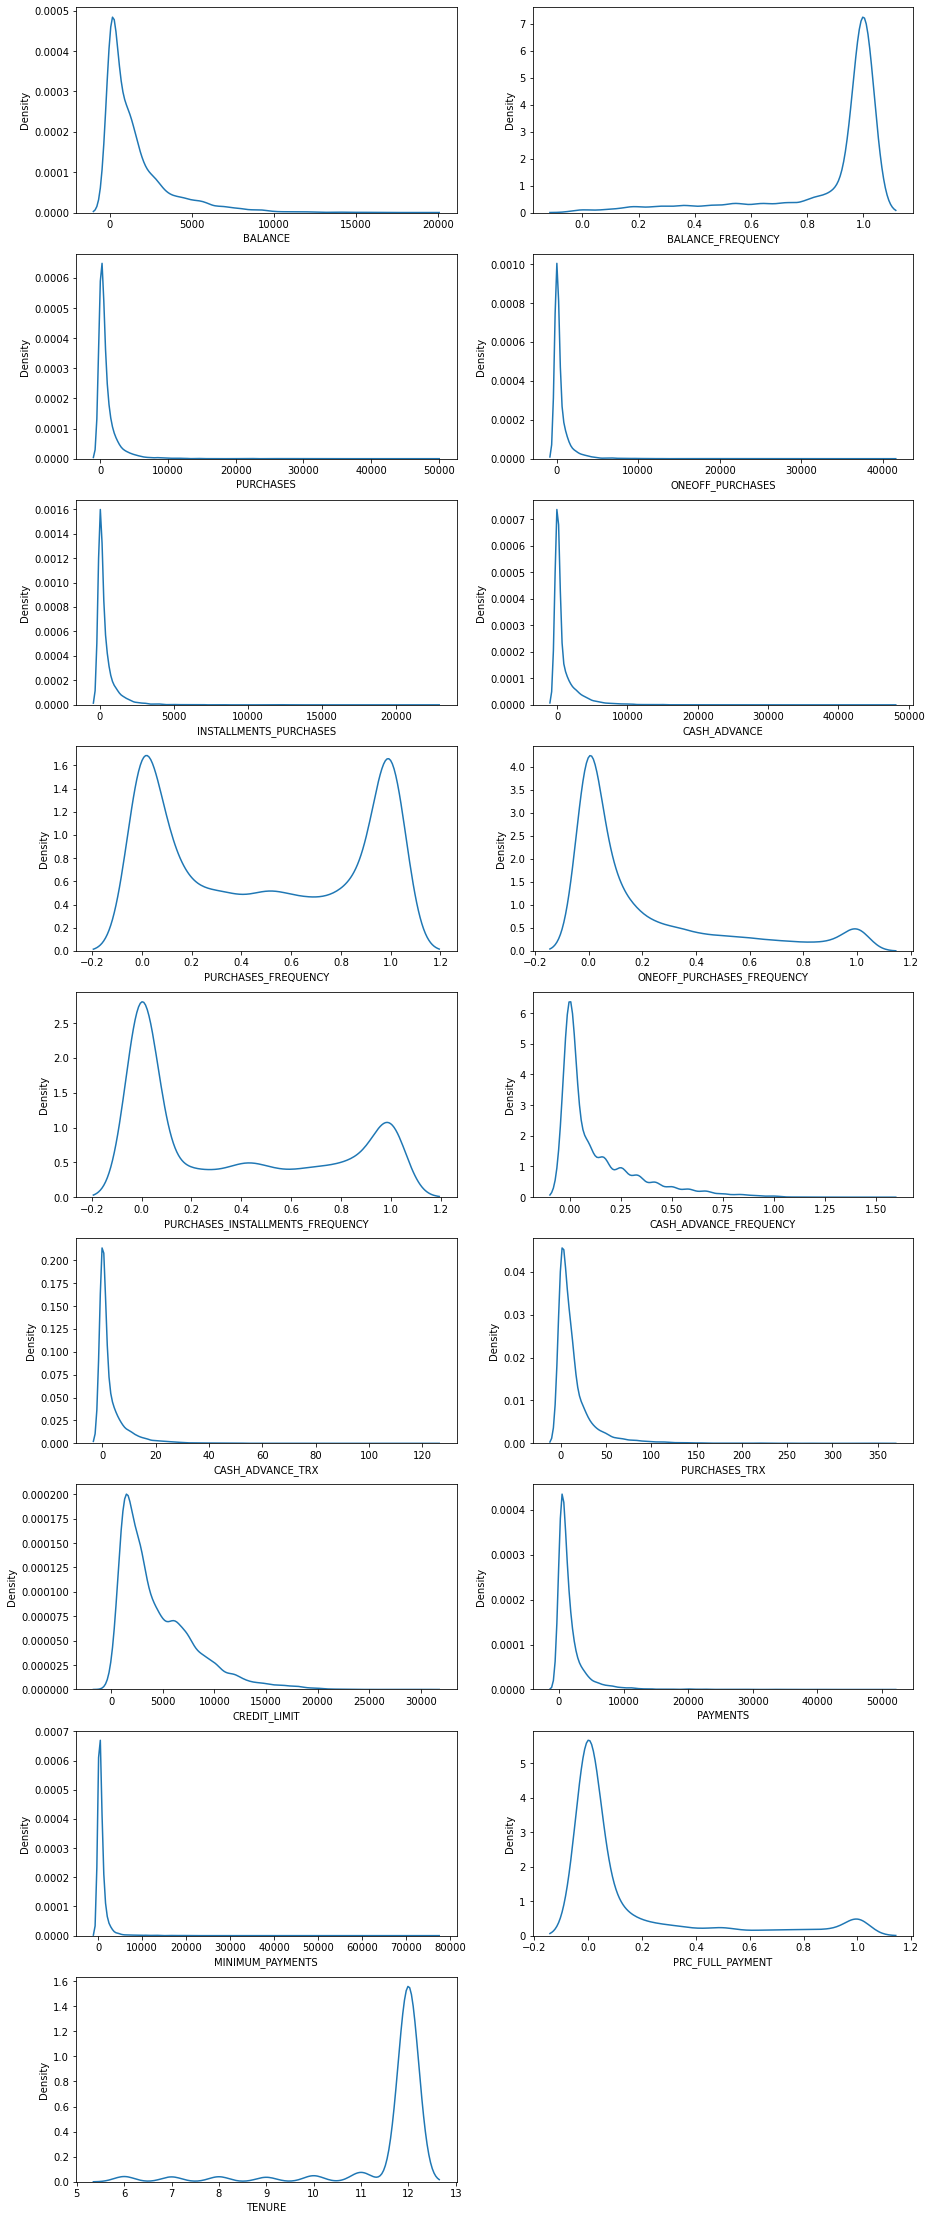

In [53]:
#Exploratory Data Analysis - 2
plt.figure(figsize=(15,40))
for i,col in enumerate (df.columns):
    ax = plt.subplot(9,2,i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

<AxesSubplot:>

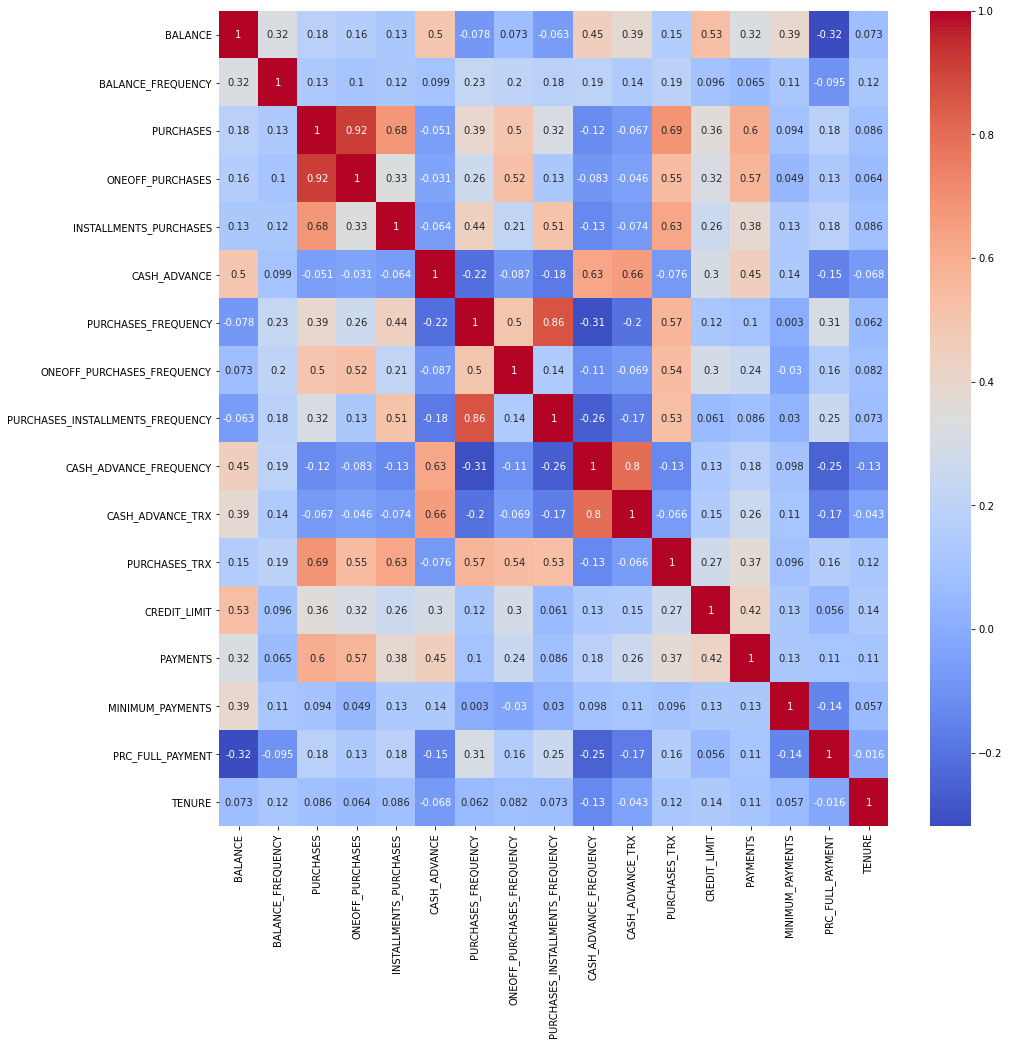

In [54]:
#Checking Correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [55]:
#Prep Work for splitting data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



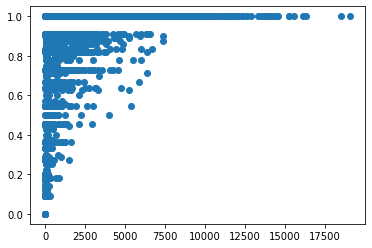

In [56]:
##Standard Scaling
#for col in df.columns:
    #Train_Test_Split

x_train, x_test, y_train, y_test = train_test_split(df['BALANCE'].values, df['BALANCE_FREQUENCY'].values, test_size = 0.2, random_state=0)

    #Reshaping
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

    #Normalizing
scaler = StandardScaler()

norm_x_train = scaler.fit_transform(x_train)
norm_x_test = scaler.transform(x_test)

plt.scatter(x_train,y_train)

In [57]:
#df.corr()
# pp = sns.pairplot(data=df,
#                   x_vars=['BALANCE'],
#                   y_vars= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
# 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
# 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [58]:
#Manual Check on Correlation
# pp = sns.pairplot(data=df, 
#                   x_vars=['CASH_ADVANCE_FREQUENCY'], 
#                   y_vars= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
# 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
# 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [59]:
# pp = sns.pairplot(data=df, 
#                   x_vars=['CASH_ADVANCE_TRX'], 
#                   y_vars= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
# 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
# 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [60]:
#Use PCA to Process the Data

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

In [61]:
#Use Kmeans to cluster the data
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

#Labelling
df['cluster_id'] = kmeans.labels_
df['cluster_id']


0       1
1       2
2       2
3       2
4       1
       ..
8945    1
8946    1
8947    1
8948    1
8949    1
Name: cluster_id, Length: 8950, dtype: int32

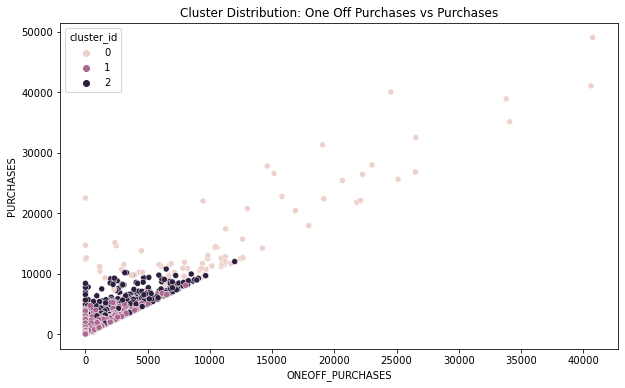

In [62]:
##Plot the Figures
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title ('Cluster Distribution: One Off Purchases vs Purchases')
plt.show()

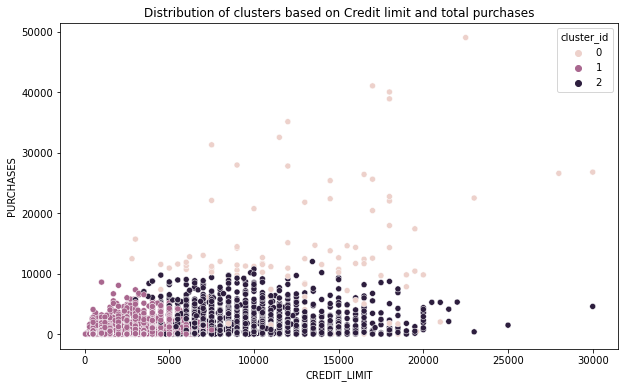

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()



Text(0.5, 1.0, 'Credit Limit vs Purchases')

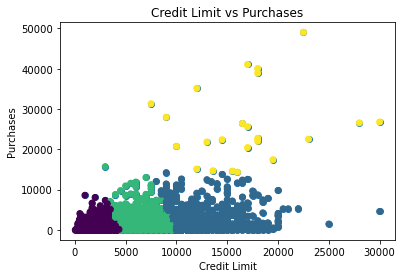

In [65]:
#Another Way

x_train, x_test, y_train, y_test = train_test_split(df['CREDIT_LIMIT'].values, df['PURCHASES'].values, test_size = 0.2, random_state=0)
#points = zip(x_train,y_train)
points = np.column_stack((x_train, y_train))
plt.scatter(x_train,y_train)

model = KMeans(n_clusters = 4)
model.fit(points)
labels = model.predict(points)
plt.scatter(x_train,y_train,c=labels)
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.title('Credit Limit vs Purchases')

Text(0.5, 1.0, 'Credit Limit vs One-Off Purchases')

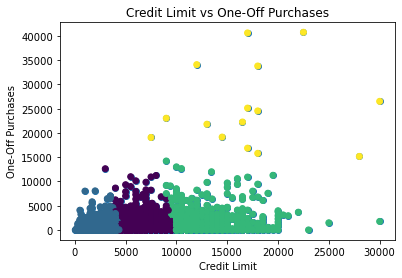

In [66]:
#Another Way

x_train, x_test, y_train, y_test = train_test_split(df['CREDIT_LIMIT'].values, df['ONEOFF_PURCHASES'].values, test_size = 0.2, random_state=0)
#points = zip(x_train,y_train)
points = np.column_stack((x_train, y_train))
plt.scatter(x_train,y_train)

model = KMeans(n_clusters = 4)
model.fit(points)
labels = model.predict(points)
plt.scatter(x_train,y_train,c=labels)
plt.xlabel('Credit Limit')
plt.ylabel('One-Off Purchases')
plt.title('Credit Limit vs One-Off Purchases')

Text(0.5, 1.0, 'Cluster Distribution: One-Off Purchases vs Credit Limit')

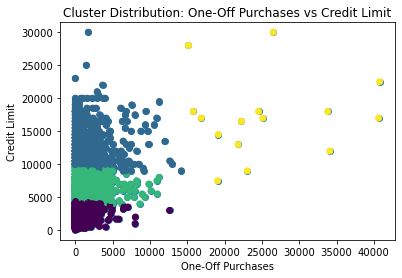

In [67]:
#Another Way

x_train, x_test, y_train, y_test = train_test_split(df['ONEOFF_PURCHASES'].values, df['CREDIT_LIMIT'].values, test_size = 0.2, random_state=0)
#points = zip(x_train,y_train)
points = np.column_stack((x_train, y_train))
plt.scatter(x_train,y_train)

model = KMeans(n_clusters = 4)
model.fit(points)
labels = model.predict(points)
plt.scatter(x_train,y_train,c=labels)
plt.xlabel('One-Off Purchases')
plt.ylabel('Credit Limit')
plt.title('Cluster Distribution: One-Off Purchases vs Credit Limit')

Text(0.5, 1.0, 'Cluster Distribution: Balance vs Purchase Frequency')

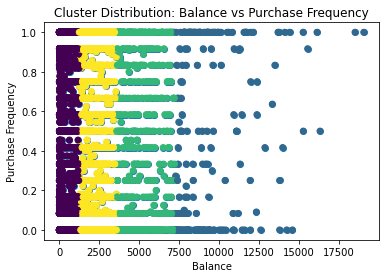

In [69]:
#Another Way

x_train, x_test, y_train, y_test = train_test_split(df['BALANCE'].values, df['PURCHASES_FREQUENCY'].values, test_size = 0.2, random_state=0)
#points = zip(x_train,y_train)
points = np.column_stack((x_train, y_train))
plt.scatter(x_train,y_train)

model = KMeans(n_clusters = 4)
model.fit(points)
labels = model.predict(points)
plt.scatter(x_train,y_train,c=labels)
plt.xlabel('Balance')
plt.ylabel('Purchase Frequency')
plt.title('Cluster Distribution: Balance vs Purchase Frequency')

In [73]:
#Another Way

x_train, x_test, y_train, y_test = train_test_split(df['CASH_ADVANCE_TRX'].values, df['PRC_FULL_PAYMENT'].values, test_size = 0.2, random_state=0)
#points = zip(x_train,y_train)
points = np.column_stack((x_train, y_train))
plt.scatter(x_train,y_train)

model = KMeans(n_clusters = 4)
model.fit(points)
labels = model.predict(points)
plt.scatter(x_train,y_train,c=labels)
plt.xlabel('Number of Cash in Advance')
plt.ylabel('Percentage of Full Payment')
plt.title('Cluster Distribution: Number of Cash in Advance vs Percentage of Full Payment')

KeyError: 'CASHADVANCETRX'